# Description of this code
This code prepare the data, create the first visualization and compute the statistics analysis in order to prepare the machine learning of "Attrition" prediction within the given "dummy" data set

# Install functions

In [1]:
pip install prince

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [7]:
# Load the data from an Excel file - adapt the route depending of your computer
base_directory = '/Users/cash/Documents/FORMATION/PRATIQUE/People analytic training'
file_name = 'WA_Fn-UseC_-HR-Employee-Attrition.xls'
ds_file_path = os.path.join(base_directory, file_name)

df = pd.read_excel(ds_file_path)

# Display the first few rows of the DataFrame
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1. Exploratory Data Analysis

#  1.1 Overview of the data

### Check the shape of the  DataFrame

Shape of the DataFrame: (1470, 35)


<Axes: ylabel='count'>

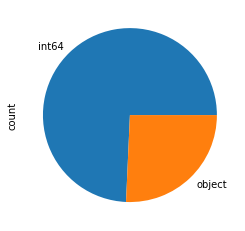

In [8]:
print("Shape of the DataFrame:", df.shape)
df.dtypes.value_counts().plot.pie()

### Heat map of the missing values
We have missing value in this data set

<Axes: >

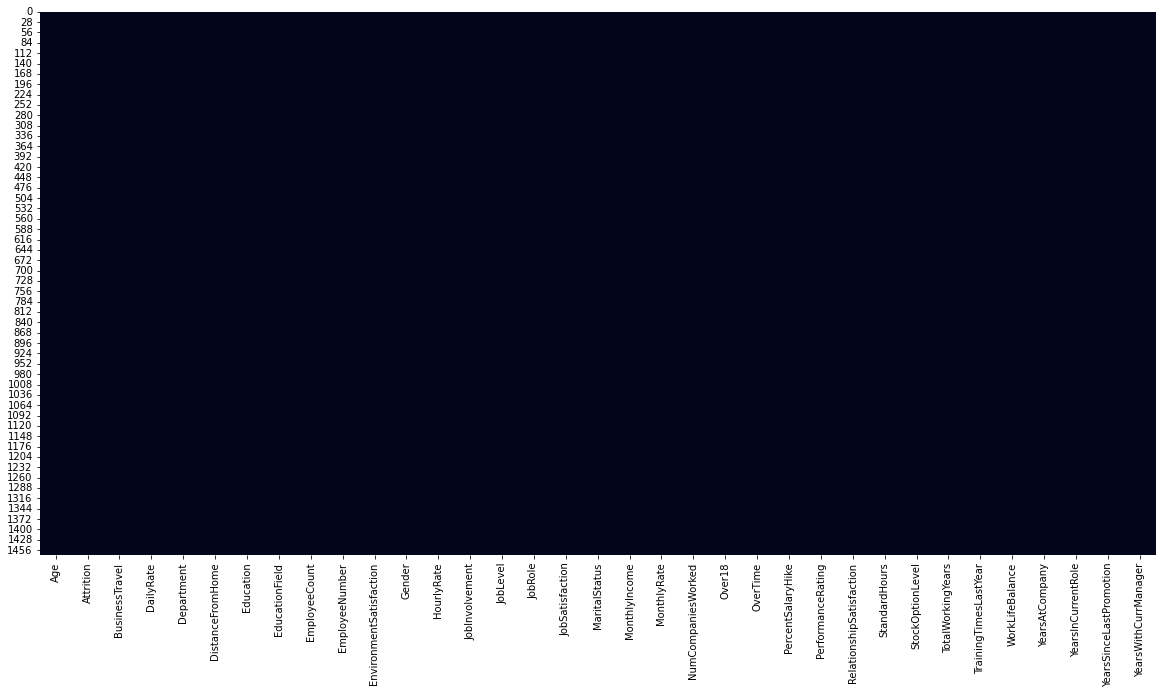

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

# 1.2 Cleaning Values

### Missing Value share %
In this case it is useless, but I kept this function just for methodology purposes. Besides, this calculation confirm that we do not have missing value

In [10]:
MissingValues = (df.isna().sum()/df.shape[0]).sort_values(ascending=True)
MissingValuesPurcentage = MissingValues * 100
print("Missing Values in %: ")
print("="*30)

print(MissingValuesPurcentage)

Missing Values in %: 
Age                         0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
MonthlyIncome               0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
StandardHours               0.0
YearsSinceLastPromotion     0.0
MaritalStatus               0.0
JobRole                     0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
JobSatisfaction             0.0
EducationField              0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate        

### Missing Values management
Note: We are here cleaning the data. The original "dummy" data set is really clean so that not too many cleaning is necessary. We will only remove "EmployeeCount" 

#### EmployeeCount
We will remove missing EmployeeCount and EmployeeNumber

In [11]:
df = df.dropna(subset=['EmployeeCount'])

In [12]:
df = df.dropna(subset=['EmployeeNumber'])

# 1.3 New Data Set

### New Heat map of values after cleaning

<Axes: >

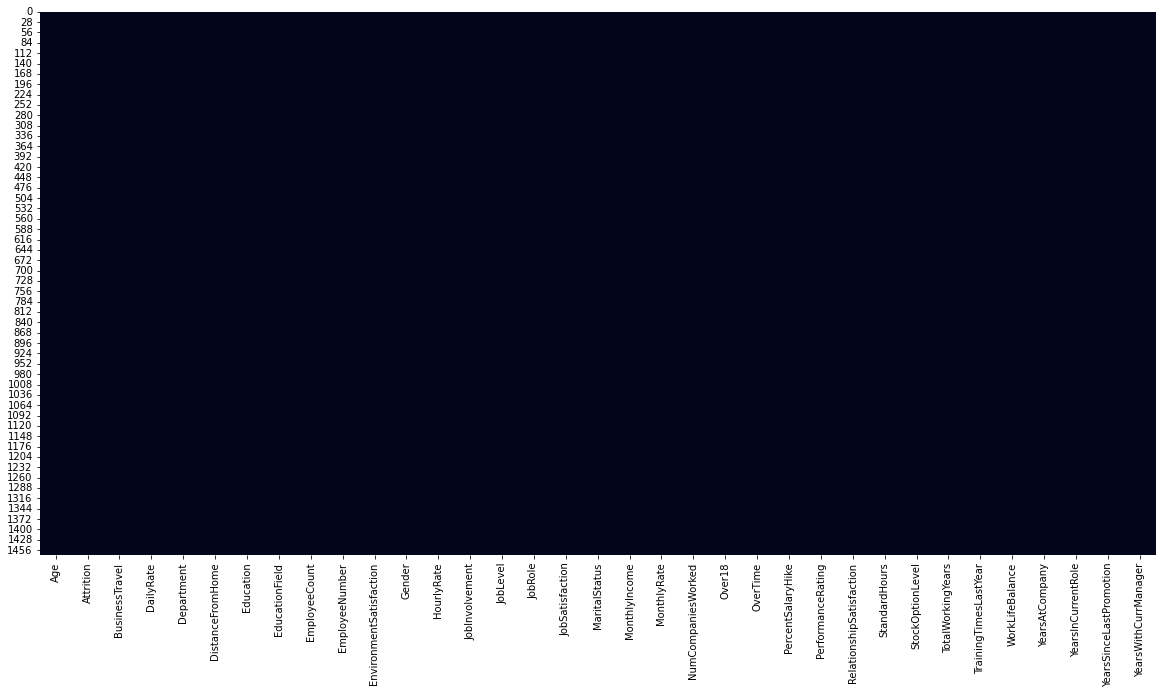

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## New data set after cleaning

In [14]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (1470, 35)


# 2 Visualization

### 2.1 General view of the data 

<Figure size 1440x1152 with 0 Axes>

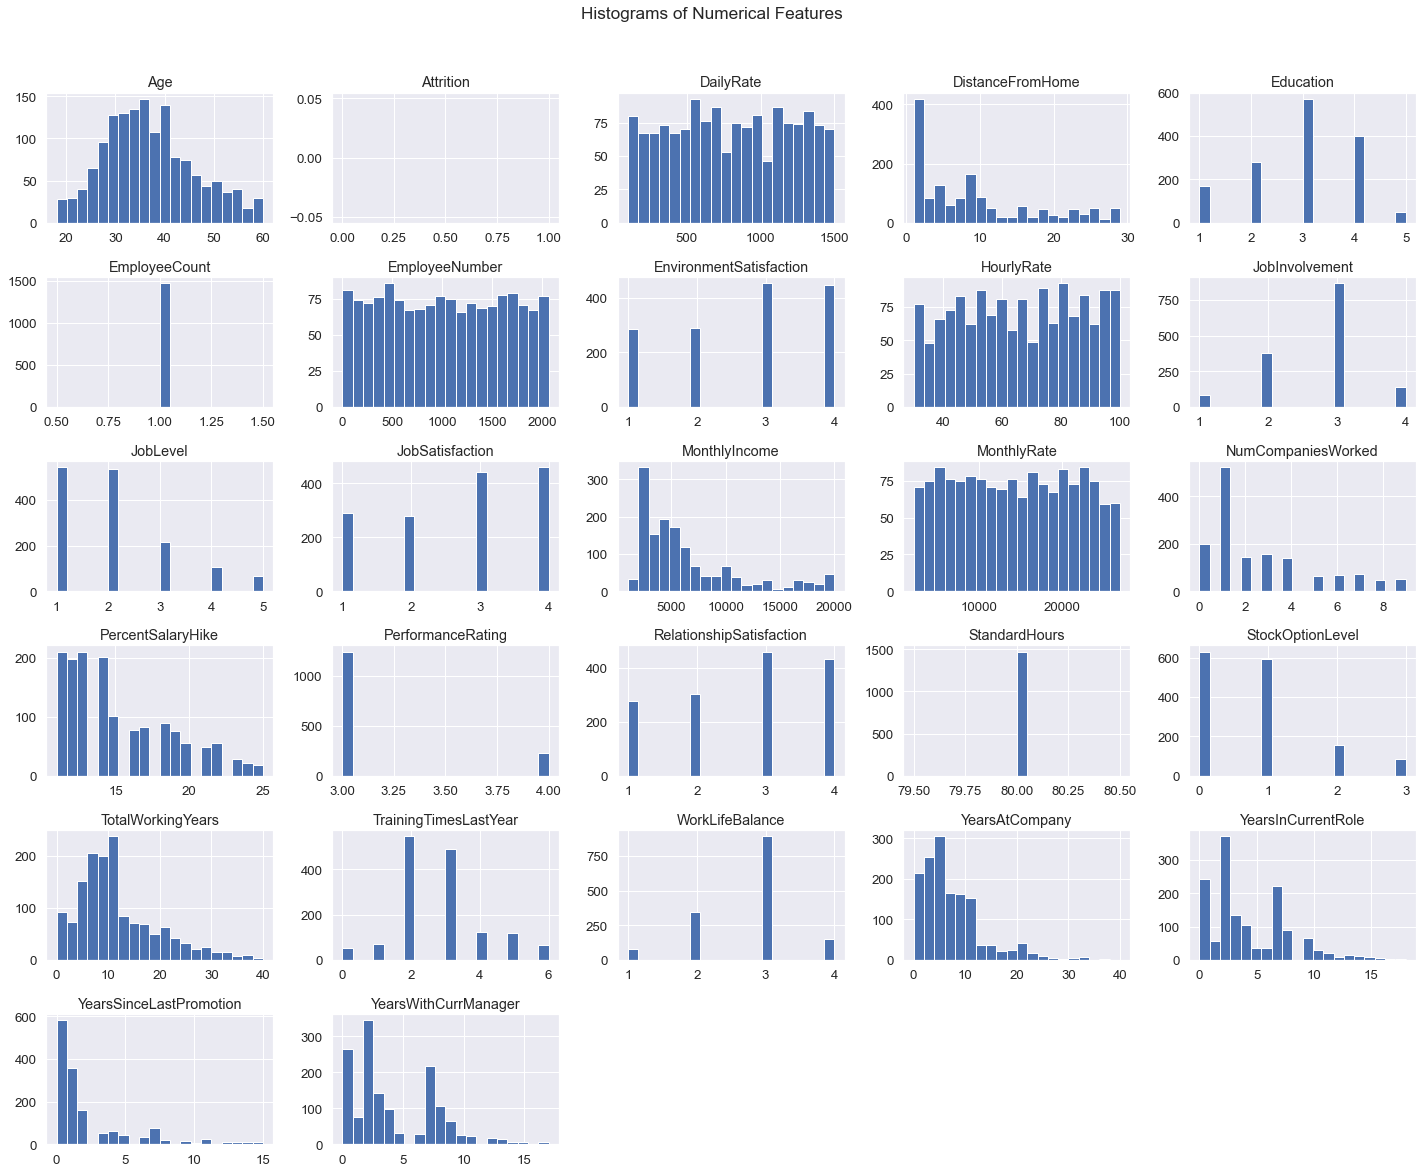

In [45]:
# Visualize features using histograms and bar plots
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
plt.figure(figsize=(20, 16))
df[numerical_cols].hist(bins=20, figsize=(20, 16))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

## 2.2 Violin plot of the data 
### Categorical features

ValueError: num must be an integer with 1 <= num <= 9, not 10

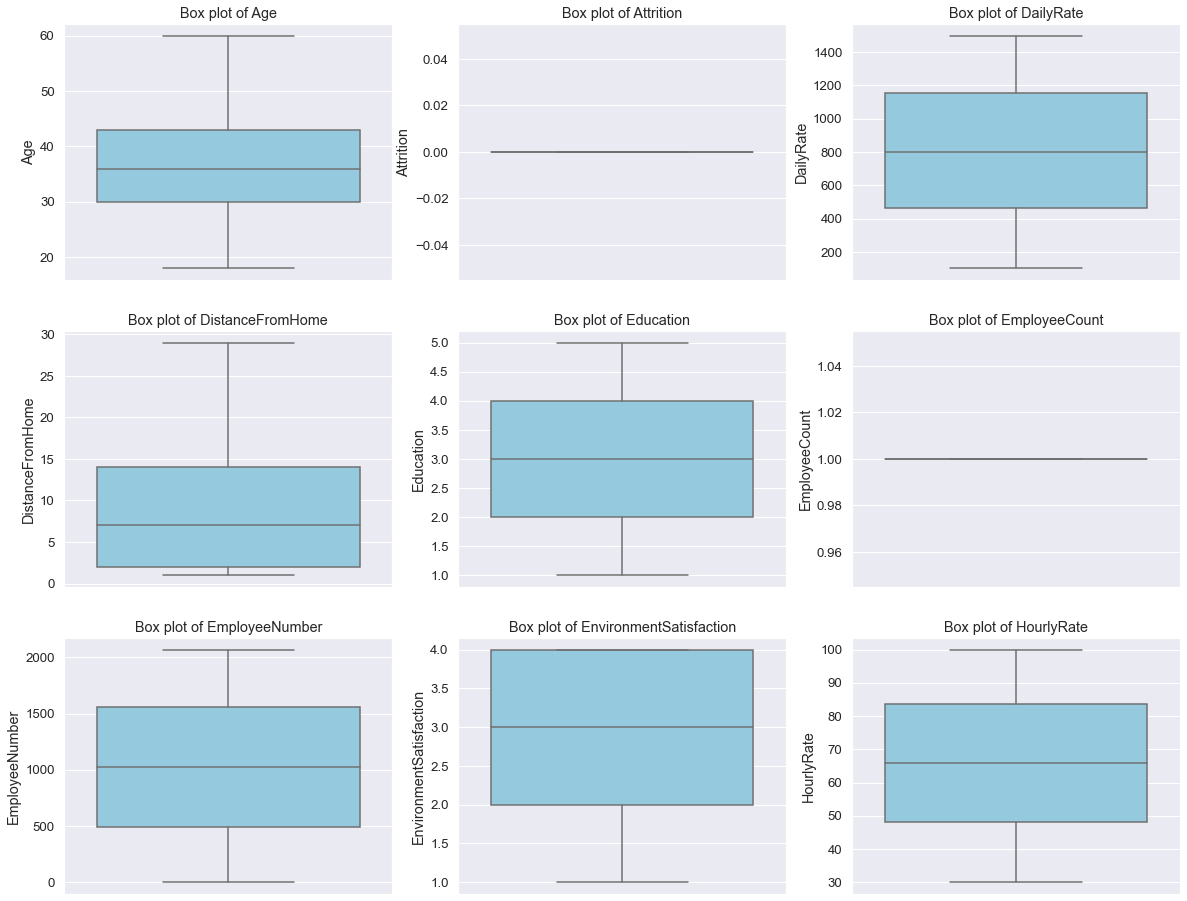

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize features using violin plots
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create violin plots for numerical features
plt.figure(figsize=(20, 16))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot layout as needed
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f"Box plot of {col}")
    plt.ylabel(col)
    
plt.suptitle("Box plot of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

### 2.3 Categorial columns 

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


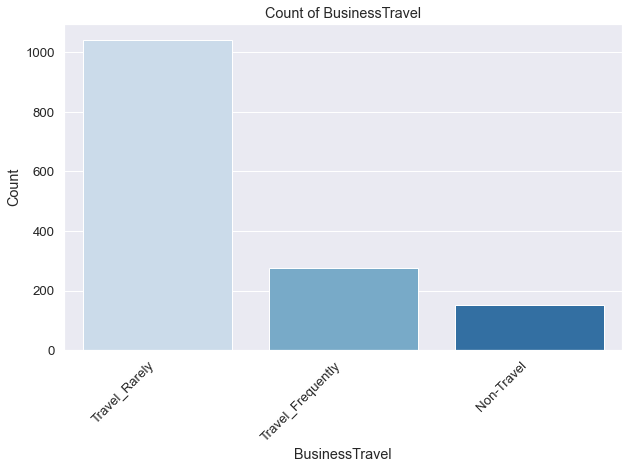

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


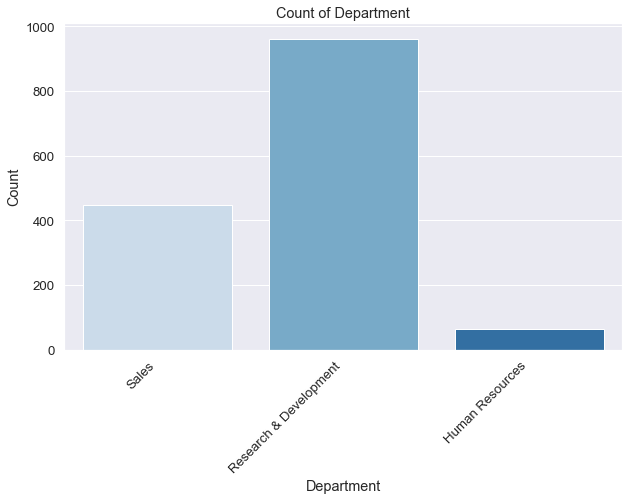

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


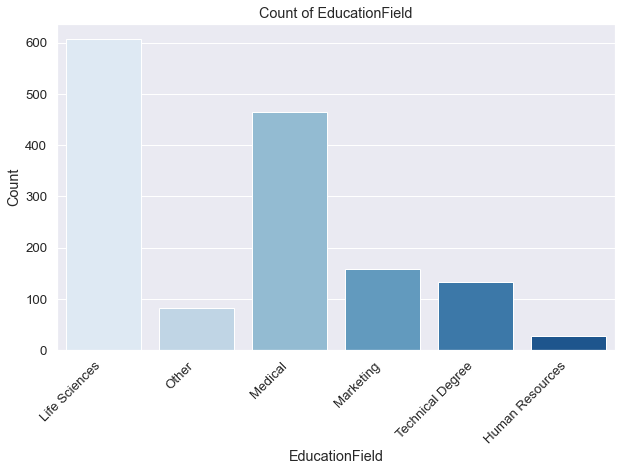

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


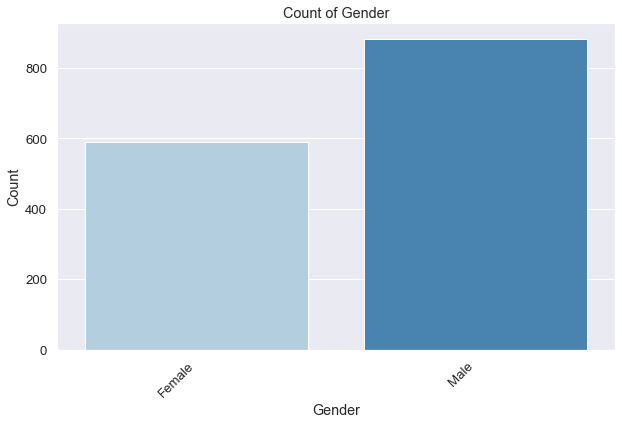

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


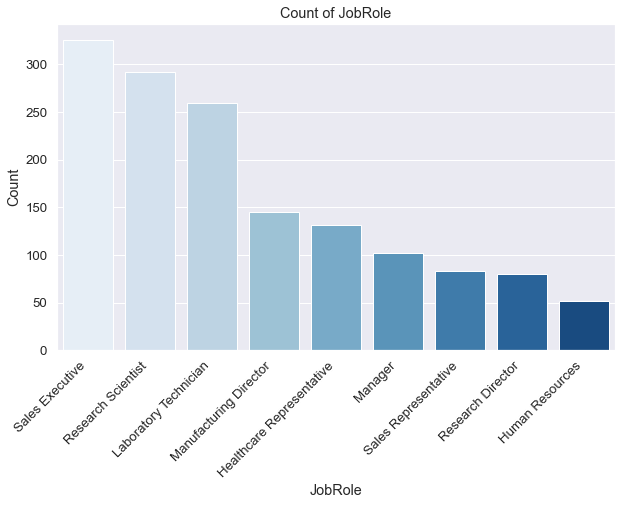

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


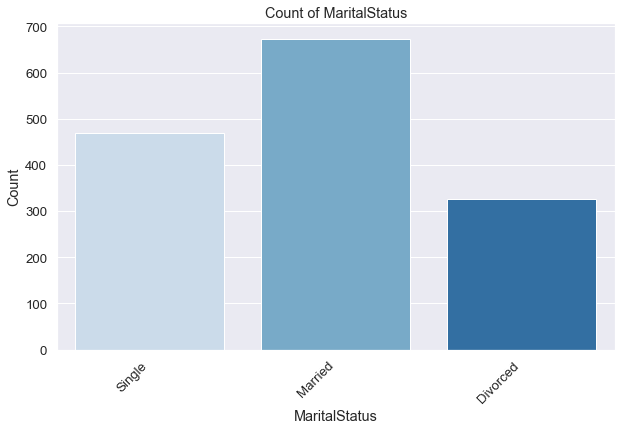

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


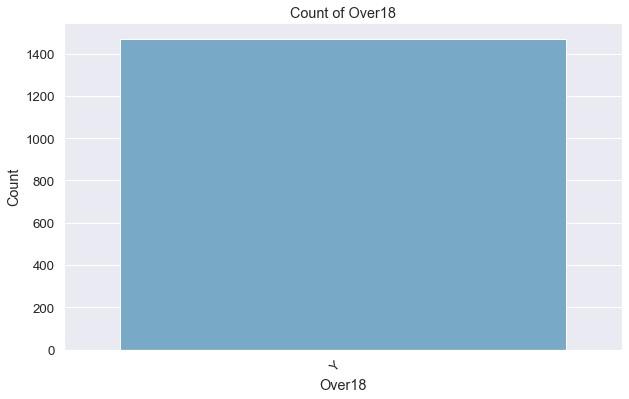

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


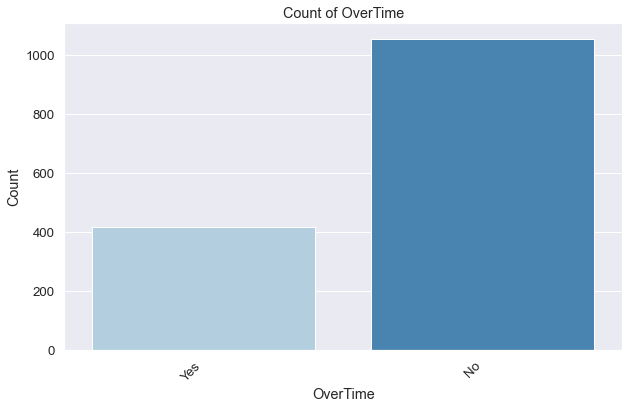

In [47]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object'])

# Loop through categorical columns and create count plots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.countplot(data=df, x=col, palette='Blues')  # Create a count plot
    plt.title(f"Count of {col}")  # Set the title
    plt.xlabel(col)  # Set the x-axis label
    plt.ylabel("Count")  # Set the y-axis label
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()  # Show the plot



### 2.4 Display data types of all columns in the DataFrame

In [15]:
data_types = df.dtypes
print("Data types: ")
print("="*30)
print(data_types)

Data types: 
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

In [43]:
float_columns = df.select_dtypes(include=['float']).columns.tolist()
print("Float column titles: ")
print("="*30)
print(float_columns)

Float column titles: 
['Attrition']


In [44]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Object column titles: ")
print("="*30)
print(object_columns)

Object column titles: 
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


### Target variable description

In [18]:
# df['Attrition'].value_counts(normalize=True)
column_name = 'Attrition'

# escribe() method to calculate statistical values
statistics = df[column_name].describe()

# Print the statistical values
print(statistics)

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object


### 2.5 Relation Target vs Variables 
#### "Attrition" is our "Target" in this example
#### Creating positive and negative classes of attrition

In [19]:
positive_df = df[df['Attrition'] == 'Yes']

In [20]:
negative_df = df[df['Attrition'] == 'No']

In [52]:
# Convert categorical columns to numeric if needed
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

In [53]:
# Check for null values
print(df[numeric_cols].isnull().sum())

Age                            0
Attrition                   1470
DailyRate                      0
DistanceFromHome               0
Education                      0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobSatisfaction                0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked             0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBalance                0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
dtype: int64


### 2.6 Relation between numerical variables en Target

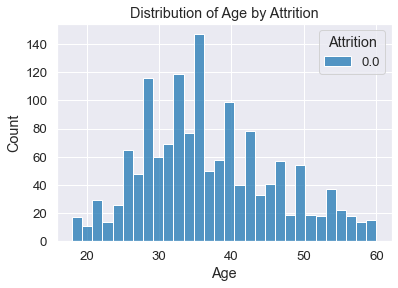

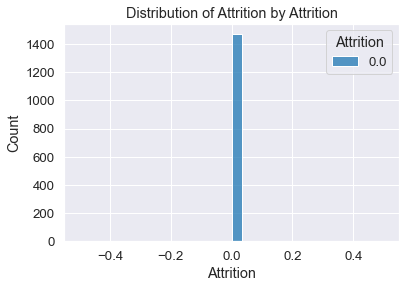

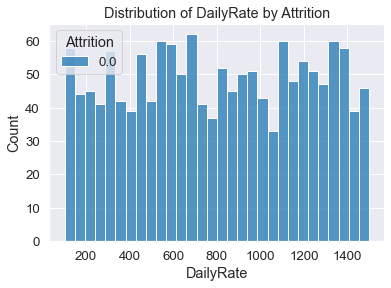

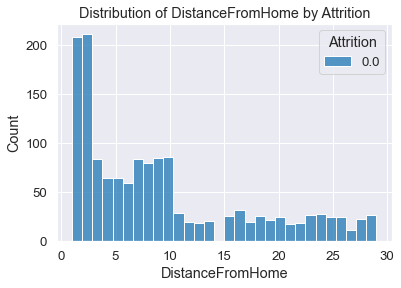

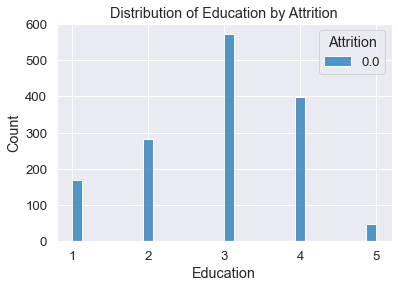

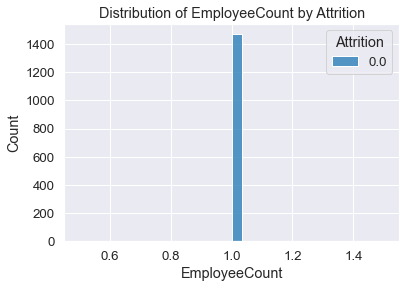

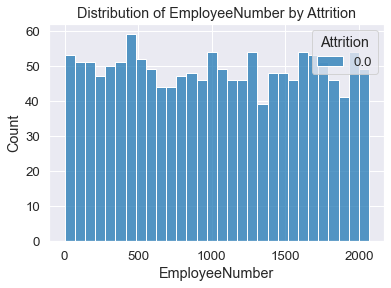

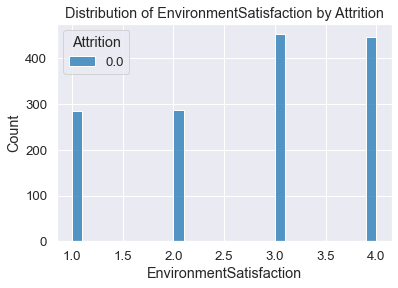

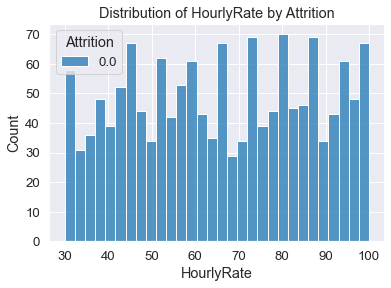

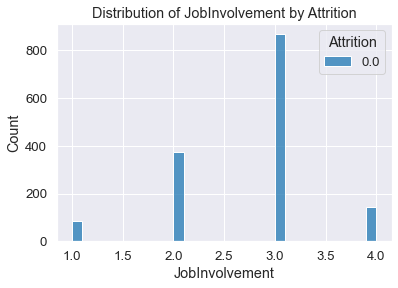

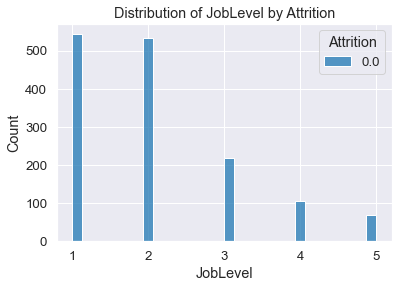

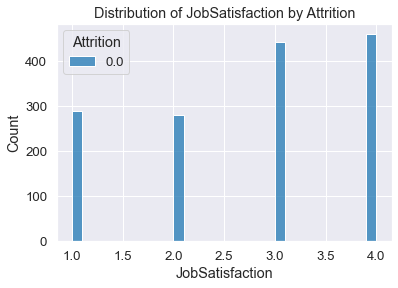

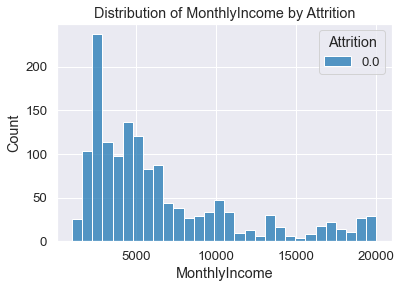

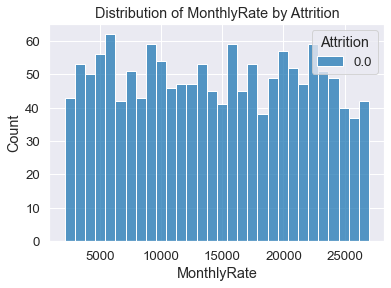

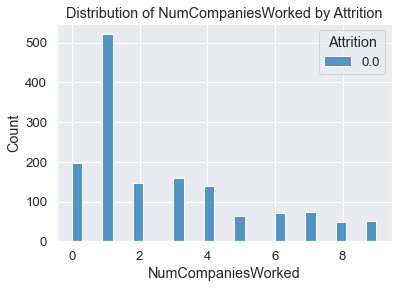

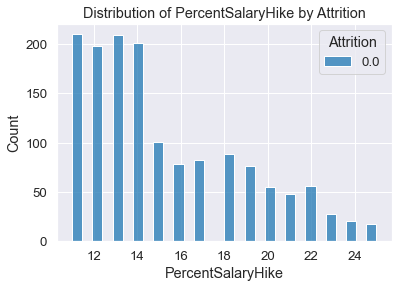

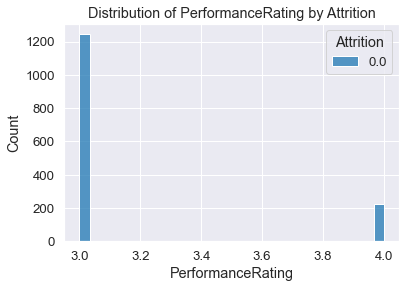

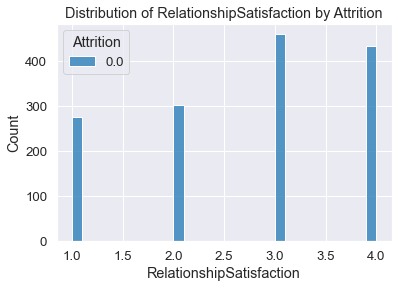

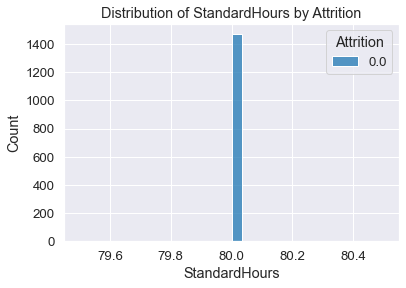

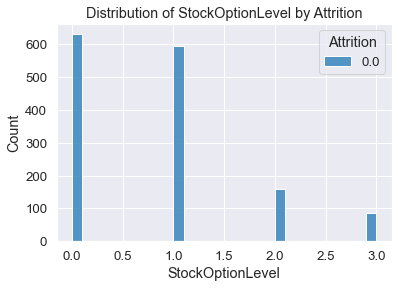

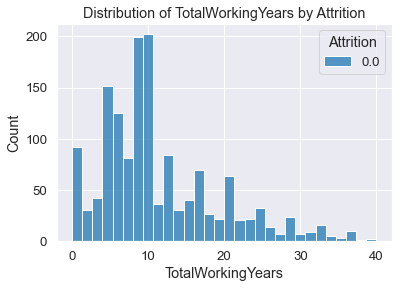

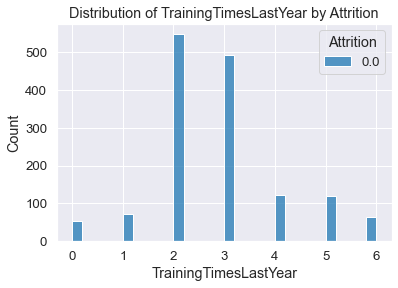

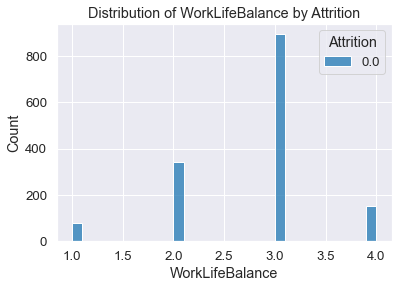

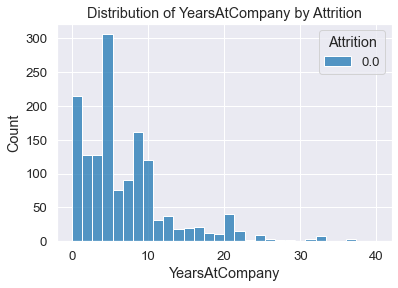

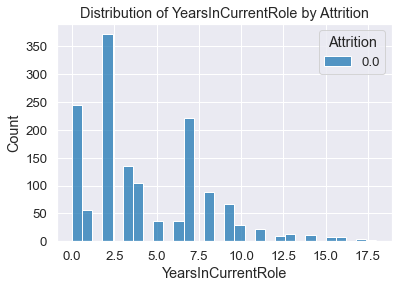

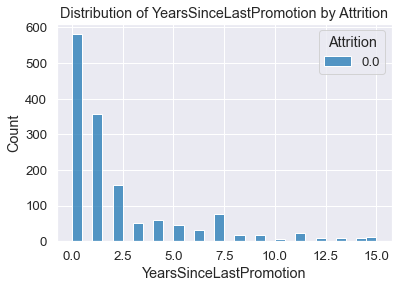

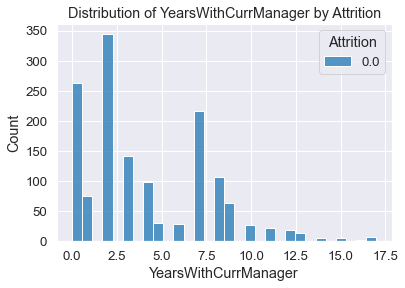

In [58]:
# Fill missing values in the 'Attrition' column with 0
df['Attrition'] = df['Attrition'].fillna(0)

# Loop through each numeric column and create a distribution plot for 'Yes' and 'No'
for col in numeric_cols:
    plt.figure()
    colors = ['tab:blue', 'tab:orange']  # Set colors for 'No' and 'Yes'
    sns.histplot(data=df, x=col, hue='Attrition', multiple="stack", palette=colors, bins=30)
    plt.title(f'Distribution of {col} by Attrition')
    plt.xlabel(col)
    plt.show()


# 3 Encoding

### 3.1 One Hot encoding function
Dedicated to binary categorical variables: 
example Attrition

    Apply one-hot encoding to the specified categorical columns in a DataFrame.
    
    Parameters:
    - df (DataFrame): The input DataFrame.
    - categorical_cols (list): A list of column names to one-hot encode.
    
    Returns:
    - df_encoded (DataFrame): The DataFrame with one-hot encoding applied to the specified columns.

In [21]:
def one_hot_encode(df, categorical_cols):
    # Select binary categories
    binary_cols = [col for col in categorical_cols if col in df.columns]
    
    # Conservez les colonnes binaires sans modification
    df_encoded = df[binary_cols].copy()
    
    # Appliquez le one-hot encoding to categorials coloums
    for col in categorical_cols:
        if col in df.columns and col not in binary_cols:
            encoded_cols = pd.get_dummies(df[col], prefix=col)
            df_encoded = pd.concat([df_encoded, encoded_cols], axis=1)
    
    return df_encoded

### 3.2 Label encoding

Label encoding dedicated to the specified categorical columns in a DataFrame.
    
    Parameters:
    - df (DataFrame): The input DataFrame.
    - categorical_cols (list): A list of column names to apply label encoding to.
    
    Returns:
    - df_encoded (DataFrame): The DataFrame with label encoding applied to the specified columns.

In [22]:
def label_encode(df_encoded, categorical_cols, exclude_cols=[]):
    new_df = df_encoded.copy()  # Créez une copie du DataFrame pour éviter de modifier l'original
    label_encoder = LabelEncoder()
    
    for col in categorical_cols:
        if col in df_encoded.columns and col not in exclude_cols:
            if set(df_encoded[col]) == {'Yes', 'No'}:  # Vérifiez si les valeurs sont 'Yes'/'No'
                new_df[col] = df_encoded[col].map({'Yes': True, 'No': False})
            else:
                new_df[col] = label_encoder.fit_transform(df_encoded[col])
    
    return new_df

In [23]:
def custom_encode(df_encoded, binary_cols):
    new_df = df_encoded.copy()  # Créez une copie du DataFrame pour éviter de modifier l'original
    
    binary_mapping = {"Yes": 1, "No": 0}  # Mappage binaire pour "Yes" et "No"
    
    for col in binary_cols:
        if col in df_encoded.columns:
            new_df[col] = df_encoded[col].map(binary_mapping)
    
    return new_df

### 3.3 List to be encoded

In [24]:
# binary list
binary_columns = ['Attrition', 'OverTime']

# Categorical list
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']

### 3.4 new_df after encoding

In [25]:
# one-hot encoding applied first
df_encoded = one_hot_encode(df, binary_columns + categorical_columns)

# Then normalisation
df_encoded = custom_encode(df_encoded, binary_columns)

# finally label_encoding
new_df = label_encode(df_encoded, categorical_columns)

new_df.head()

,Attrition,OverTime,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,1,1,2,2,1,0,7,2,0
1,0,0,1,1,1,1,6,1,0
2,1,1,2,1,4,1,2,2,0
3,0,1,1,1,1,0,6,1,0
4,0,0,2,1,3,1,2,1,0


In [26]:
new_df.shape

(1470, 9)

# 4 Advanced analysis

### 4.1 Correlation hetmap / numerical variables

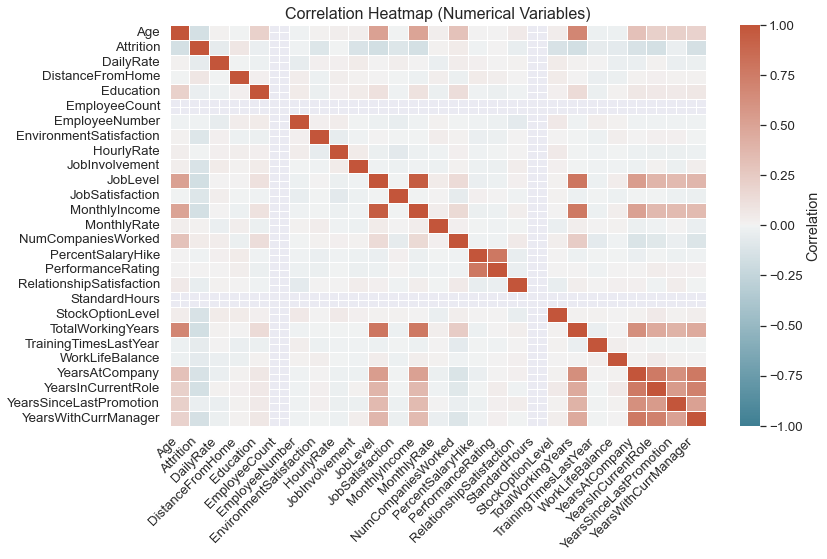

In [35]:
# Select the numerical columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a correlation heatmap with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the figure size for better visibility

# Customize the colormap for better contrast
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap without annotations
heatmap = sns.heatmap(correlation_matrix, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1, ax=ax)

# Add a title
plt.title('Correlation Heatmap (Numerical Variables)', fontsize=16)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment
plt.yticks(rotation=0)

# Add a colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Correlation', rotation=90)

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()


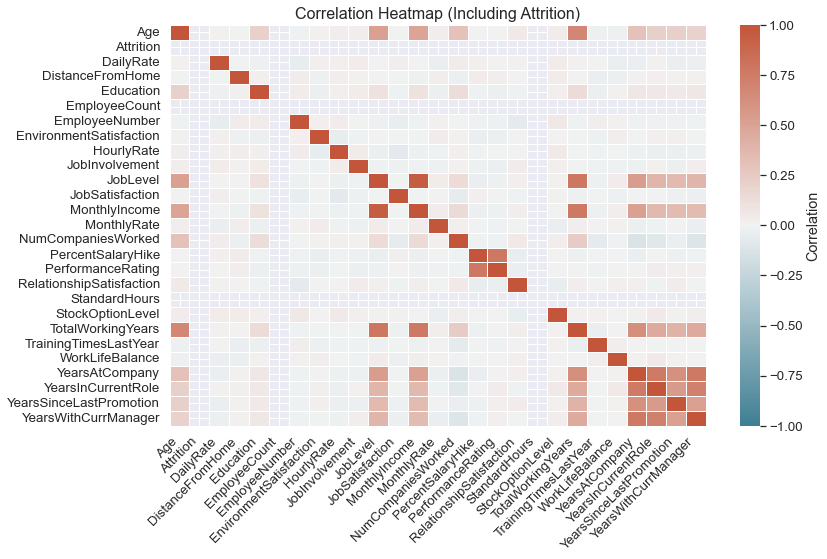

In [37]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported your DataFrame 'df' and converted 'Attrition' to 0/1
# You can create a new column 'Attrition_Numeric' with numerical values

# Map 'No' to 0 and 'Yes' to 1 in the new column
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Select the numerical columns from the DataFrame, including 'Attrition_Numeric'
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a correlation heatmap with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the figure size for better visibility

# Customize the colormap for better contrast
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap without annotations
heatmap = sns.heatmap(correlation_matrix, cmap=cmap, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, ax=ax)

# Add a title
plt.title('Correlation Heatmap (Including Attrition)', fontsize=16)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment
plt.yticks(rotation=0)

# Add a colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Correlation', rotation=90)

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()


###  4.2 Annova
For continuous predictor variables, we will use ANOVA (Analysis of Variance) and t-tests to assess whether there are significant differences in means between different levels of the variable with respect to "Attrition."

p-Value Analysis (t-tests and ANOVA):
The p-value analysis is used to assess the significance of differences in means or proportions between different levels of a categorical variable or groups defined by a continuous variable.

T-tests are used when comparing means between two groups, and ANOVA (Analysis of Variance) is used when comparing means among multiple groups.
The analysis calculates a p-value, which indicates the probability of observing the observed differences or more extreme differences if there were no actual differences between groups.

A lower p-value suggests that there are significant differences in means between groups.

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Assuming you have already imported your DataFrame 'df' and converted 'Attrition' to 0/1

# Impute missing values in 'Attrition' with the most frequent category ('No' or 0)
new_df['Attrition'].fillna(0, inplace=True)

# Create a formula for the ANOVA model
formula = 'Attrition ~ ' + ' + '.join(new_df.select_dtypes(include=['int64', 'float64']).columns)

# Fit the ANOVA model
model = ols(formula=formula, data=new_df).fit()

# Perform the ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Convert the ANOVA result to a DataFrame
anova_result_df = pd.DataFrame(anova_result)

# Add a 'Variable' column with variable names
anova_result_df['Variable'] = anova_result.index

# Specify the path where you want to save the Excel file
excel_file_path = 'anova_results_with_variable_names.xlsx'

# Reorder the columns to have 'Variable' as the first column
#anova_result_df = anova_result_df[['Variable'] + [col for col in anova_result_df.columns if col != 'Variable']]

# Export the DataFrame to Excel
#anova_result_df.to_excel(excel_file_path, index=False)

print("ANOVA results with variable names saved to Excel:", excel_file_path)


ANOVA results with variable names saved to Excel: anova_results_with_variable_names.xlsx


/Users/cash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1917: RuntimeWarning: invalid value encountered in true_divide
  F /= J


### 4.3 Chi square and p-value analysis

Chi-square test for each categorical variable, create a contingency table with rows representing the levels of the categorical variable and columns representing "Attrition" (yes/no).
   
Calculate the chi-square statistic and p-value. A lower p-value indicates that the variable is significantly associated with "Attrition."


In [39]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns
categorical_columns

# Create an empty dictionary to store the results
chi2_results = {}

# Loop through each categorical variable
for column in categorical_columns:
    # Create a contingency table between 'Attrition' and the current categorical variable
    contingency_table = pd.crosstab(new_df['Attrition'], new_df[column])

    # Perform the chi-squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Store the results in the dictionary
    chi2_results[column] = {
        'Chi-squared Statistic': chi2_stat,
        'P-Value': p_value,
        'Degrees of Freedom': dof,
        'Expected Frequencies Table': expected
    }

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(chi2_results, orient='index')

# Export the DataFrame to an Excel file
#results_df.to_excel('chi2_results.xlsx')

# Print the results
print(results_df)

                Chi-squared Statistic       P-Value  Degrees of Freedom  \
BusinessTravel              24.182414  5.608614e-06                   2   
Department                  10.796007  4.525607e-03                   2   
EducationField              16.024674  6.773980e-03                   5   
Gender                       1.116967  2.905724e-01                   1   
JobRole                     86.190254  2.752482e-15                   8   
MaritalStatus               46.163677  9.455511e-11                   2   
Over18                       0.000000  1.000000e+00                   0   

                                       Expected Frequencies Table  
BusinessTravel  [[125.81632653061224, 232.34081632653061, 874....  
Department      [[52.84285714285714, 806.0632653061225, 374.09...  
EducationField  [[22.646938775510204, 508.29795918367347, 133....  
Gender                            [[493.2, 739.8], [94.8, 142.2]]  
JobRole         [[109.87959183673469, 43.61632653061225, 21

### 4.4 Test de Cramer

In [61]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns
categorical_columns

# Create an empty dictionary to store the results
cramer_results = {}

# Loop through each categorical variable
for column in categorical_columns:
    # Create a contingency table between 'Attrition' and the current categorical variable
    contingency_table = pd.crosstab(new_df['Attrition'], new_df[column])

    # Perform the chi-squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramer's V
    n = contingency_table.sum().sum()  # Total number of observations
    phi2 = chi2_stat / n
    min_dim = min(contingency_table.shape) - 1
    cramer_v = (phi2 / min_dim) ** 0.5

    # Store the results in the dictionary
    cramer_results[column] = {
        'Cramer\'s V': cramer_v,
        'P-Value': p_value
    }

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(cramer_results, orient='index')

# Export the DataFrame to an Excel file
results_df.to_excel('cramer_results.xlsx')

# Print the results
print(results_df)


                Cramer's V       P-Value
BusinessTravel    0.128260  5.608614e-06
Department        0.085698  4.525607e-03
EducationField    0.104409  6.773980e-03
Gender            0.027565  2.905724e-01
JobRole           0.242142  2.752482e-15
MaritalStatus     0.177211  9.455511e-11
Over18                 NaN  1.000000e+00


#### Results:
All the numerical variables presented have important impact to attrition

### 4.5 MCA calculation
Multiple Correspondence Analysis (MCA) is used to explore and analyze relationships among multiple categorical variables. It differs from the chi-squared test, which measures independence between two categorical variables at a time.

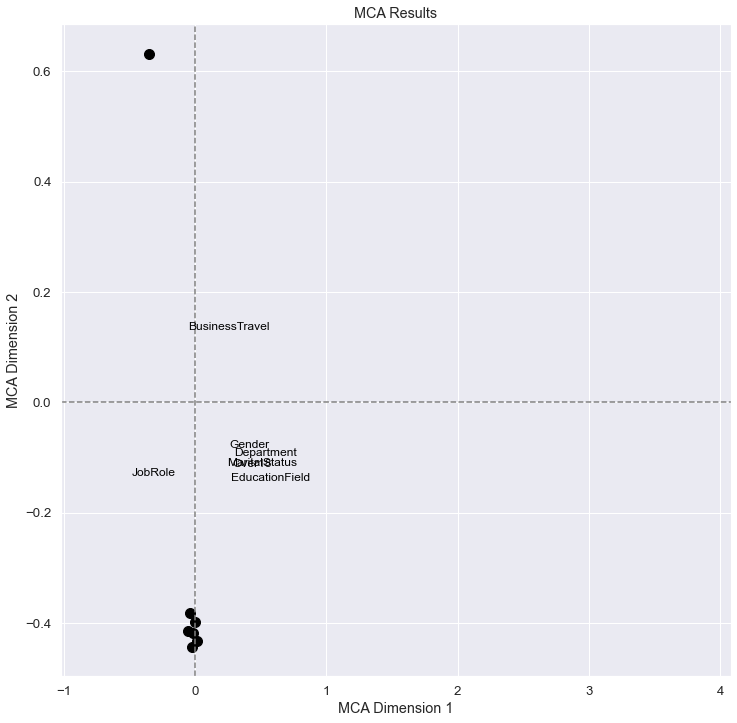

In [42]:
import pandas as pd
from prince import MCA
import matplotlib.pyplot as plt

# Specify the names of the categorical columns you want to include
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']

# Create a new DataFrame with only the specified categorical columns
categorical_df = df[categorical_cols]

# Create an MCA object and fit it to the categorical data
mca = MCA()
mca.fit(categorical_df)

# Extract the coordinates and variable labels
coordinates = mca.row_coordinates(categorical_df)
variable_labels = categorical_df.columns

# Specify the size of the figure (e.g., 12x12 inches)
plt.figure(figsize=(12, 12))

# Specify the size of the points for variable names
point_size = 100

# Create a dictionary to map specific variables to their respective colors and marker styles
variable_styles = {
    'Attrition': {'color': 'red', 'marker': 'o'},  # Example style for 'Attrition'
    # Add more variables and their styles as needed
}

# Plot the results with variable labels and adjusted point size for variable names and colors
for i, variable in enumerate(variable_labels):
    variable_coordinates = coordinates.iloc[i, :]
    style = variable_styles.get(variable, {'color': 'black', 'marker': 'o'})  # Default style for undefined variables
    
    # Adjust the space for negative values
    x_offset = 0.3 if variable_coordinates[0] < 0 else -0.5
    y_offset = 0.3 if variable_coordinates[1] < 0 else -0.5
    
    plt.scatter(variable_coordinates[0], variable_coordinates[1], s=point_size, marker=style['marker'], c=style['color'])
    plt.annotate(variable, (variable_coordinates[0] + x_offset, variable_coordinates[1] + y_offset), fontsize=12, color=style['color'])

# Add dashed lines passing through (0,0) for each dimension
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')

# Adjust the limits of the x-axis to widen the negative space
plt.xlim(coordinates.iloc[:, 0].min() - 0.5, coordinates.iloc[:, 0].max() + 0.5)

plt.xlabel('MCA Dimension 1')
plt.ylabel('MCA Dimension 2')
plt.title('MCA Results')

plt.grid(True)
plt.show()


# ----------------------------------------------------------------------------